# 온라인 쇼핑몰 매출관계 분석

- 국가통계포털 https://kosis.kr/search/search.do
- 온라인쇼핑몰 판매매체별 / 상품군별거래액
- 합계 등을 제외하고 선택(전기전자통신 2020년 전후로 분리되어서 미리 합침)
- 행렬을 전환
- 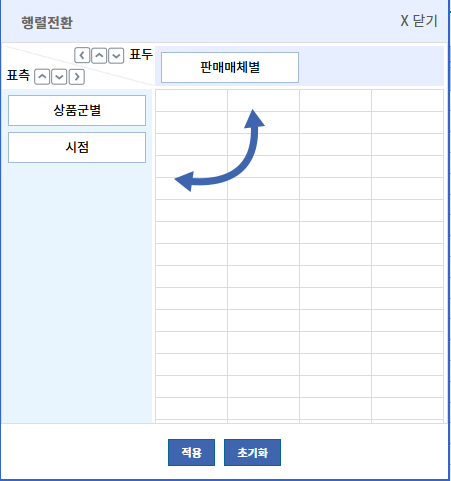 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd
from datetime import datetime



In [2]:
# font 설정 D2coding

d2_path = './ref/D2Coding-Ver1.3.2-20180524.ttf'

fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"


In [13]:
file_path = './ref/온라인쇼핑몰_판매매체별_상품군별거래액.csv'

ori = pd.read_csv(file_path, encoding="EUC-KR")  # utf-8

ori.columns = ["category", "date", "internet", "mobile"]

ori.head()

,category,date,internet,mobile
0,컴퓨터 및 주변기기,2017.01,288391,133993
1,컴퓨터 및 주변기기,2017.02,329143,146200
2,컴퓨터 및 주변기기,2017.03,322089,151262
3,컴퓨터 및 주변기기,2017.04,251604,116675
4,컴퓨터 및 주변기기,2017.05,241871,109053


In [14]:

data = ori

print("수정 전")
print(ori['date'].tail())

print("수정 후")
data['date'] = ori['date'].map(lambda x:x.rstrip(' p)'))
print(ori['date'].tail())

수정 전
2203       2024.08
2204       2024.09
2205       2024.10
2206    2024.11 p)
2207    2024.12 p)
Name: date, dtype: object
수정 후
2203    2024.08
2204    2024.09
2205    2024.10
2206    2024.11
2207    2024.12
Name: date, dtype: object


In [18]:
ori['date'] = pd.to_datetime(data["date"], format='%Y.%m')
ori.dtypes
ori.tail()

,category,date,internet,mobile
2203,기타,2024-08-01,61304,120200
2204,기타,2024-09-01,63863,126583
2205,기타,2024-10-01,68403,128216
2206,기타,2024-11-01,73246,135527
2207,기타,2024-12-01,75613,144134


In [52]:
ex1_data = ori.copy()

# ex1_data[ex1_data['category'] == '컴퓨터 및 주변기기'] 
obj = ['컴퓨터 및 주변기기', '의복', '신발', '가방', '음식서비스', '음·식료품', '애완용품', '여행 및 교통서비스']
ex1_data = ex1_data[ex1_data['category'].isin(obj)] 
ex1_data.sample(5)

,category,date,internet,mobile
1624,애완용품,2024-05-01,37561,188167
1547,애완용품,2017-12-01,23206,39074
386,의복,2017-03-01,478990,563752
1649,여행 및 교통서비스,2018-06-01,627024,786901
455,의복,2022-12-01,506958,1546355


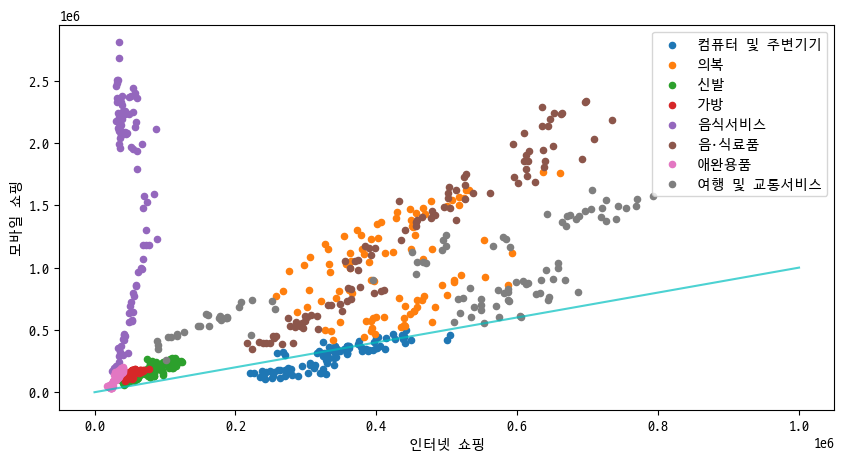

In [60]:
fig, ax = plt.subplots(figsize=(10,5))

category = obj # ['컴퓨터 및 주변기기', '의복', '신발', '가방', '음식서비스', '음·식료품', '애완용품', '여행 및 교통서비스']

for cate in category:
    category_data = ex1_data[ex1_data['category'] == cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter(x_data, y_data, s = 20, label = cate)

ax.set_xlabel('인터넷 쇼핑')
ax.set_ylabel('모바일 쇼핑')


ax.legend(loc='best')
ax.plot([0, 1000000], [0, 1000000], 'c-', alpha=0.7)
plt.show()
# print(category_data, x_data, y_data)